Evaluating all methods...

Processing TFIDF...

TFIDF Results:
------------------------------
Penalty-wise Accuracy:
  Penalty_1: 8.33% (25/300)
  Penalty_2: 5.67% (17/300)
  Penalty_3: 14.33% (43/300)
Overall Accuracy: 0.67% (2/300)

Processing BM25...

BM25 Results:
------------------------------
Penalty-wise Accuracy:
  Penalty_1: 32.00% (96/300)
  Penalty_2: 28.33% (85/300)
  Penalty_3: 29.67% (89/300)
Overall Accuracy: 26.67% (80/300)

Processing SBERT...

SBERT Results:
------------------------------
Penalty-wise Accuracy:
  Penalty_1: 42.33% (127/300)
  Penalty_2: 35.33% (106/300)
  Penalty_3: 35.00% (105/300)
Overall Accuracy: 33.67% (101/300)

Processing TinyLLM...

TinyLLM Results:
------------------------------
Penalty-wise Accuracy:
  Penalty_1: 72.00% (216/300)
  Penalty_2: 68.67% (206/300)
  Penalty_3: 69.33% (208/300)
Overall Accuracy: 68.33% (205/300)

Processing API...

API Results:
------------------------------
Penalty-wise Accuracy:
  Penalty_1: 98.00% (294/300)
  P

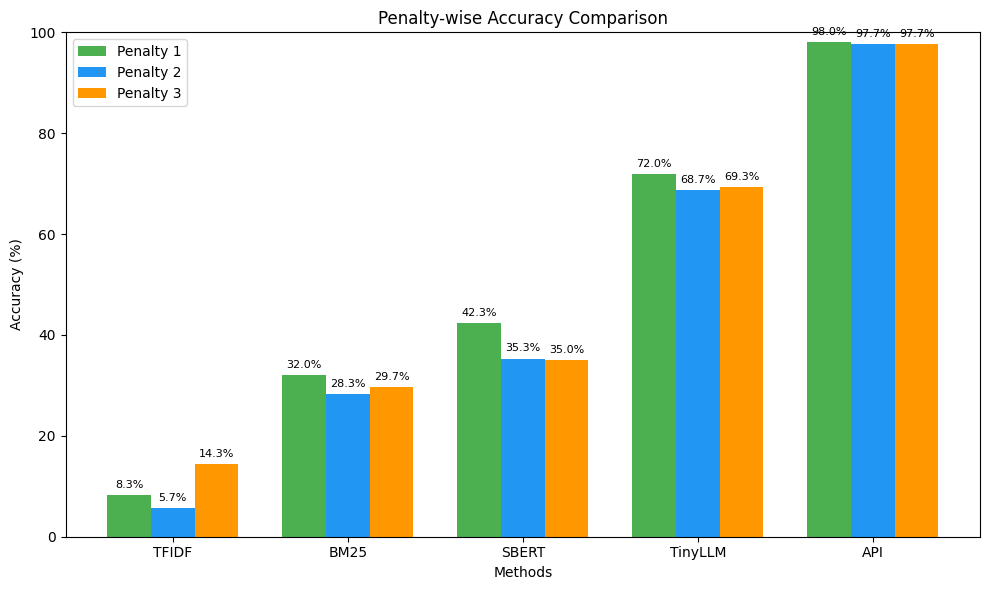

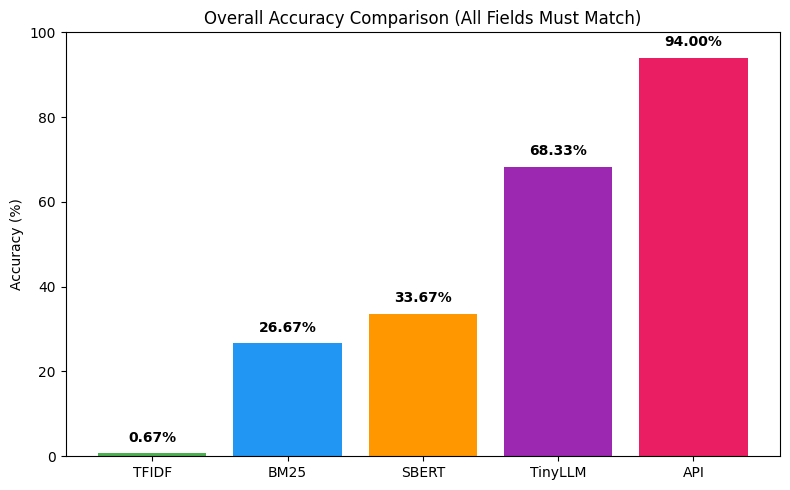


Comprehensive Accuracy Summary:
        Penalty_1 Penalty_2 Penalty_3 Overall
TFIDF       8.33%     5.67%    14.33%   0.67%
BM25       32.00%    28.33%    29.67%  26.67%
SBERT      42.33%    35.33%    35.00%  33.67%
TinyLLM    72.00%    68.67%    69.33%  68.33%
API        98.00%    97.67%    97.67%  94.00%


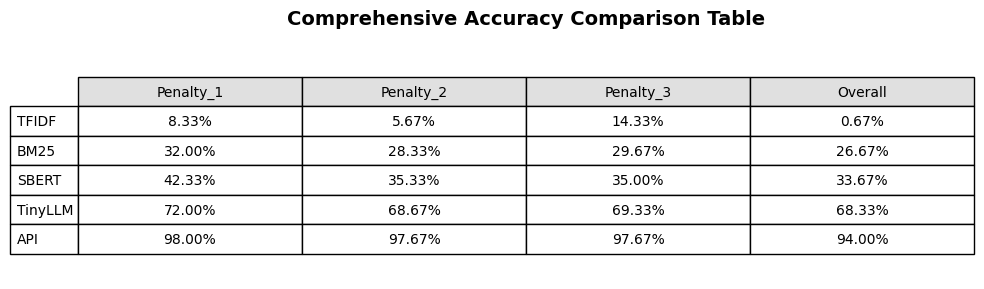

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File names for each method
methods = {
    "TFIDF": "predValueData_TFIDF.csv",
    "BM25": "predValueData_bm25.csv",
    "SBERT": "predValueData_SBERT.csv",
    "TinyLLM": "predValueData_tinyllm.csv",
    "API": "predValueData_API.csv"
}
actual_file = "actualValueData.csv"

def load_and_prepare_data(actual_file, pred_file):
    actual_df = pd.read_csv(actual_file)
    pred_df = pd.read_csv(pred_file)
    min_rows = min(len(actual_df), len(pred_df))
    actual_df = actual_df.head(min_rows)
    pred_df = pred_df.head(min_rows)
    return actual_df, pred_df

def calculate_field_accuracy(actual_df, pred_df):
    fields = [
        'Section_Number_1', 'Subsection_1', 'Paragraph_1', 'Subparagraph_1',
        'Section_Number_2', 'Subsection_2', 'Paragraph_2', 'Subparagraph_2',
        'Section_Number_3', 'Subsection_3', 'Paragraph_3', 'Subparagraph_3'
    ]
    accuracy = {}
    for field in fields:
        if field in actual_df.columns and field in pred_df.columns:
            actual = actual_df[field].fillna('')
            pred = pred_df[field].fillna('')
            matches = (actual == pred).sum()
            total = len(actual)
            accuracy[field] = {
                'accuracy': matches / total * 100,
                'matches': matches,
                'total': total
            }
    return accuracy

def calculate_penalty_accuracy(actual_df, pred_df):
    penalty_acc = {}
    for i in range(1, 4):
        fields = [f'Section_Number_{i}', f'Subsection_{i}', f'Paragraph_{i}', f'Subparagraph_{i}']
        matches = 0
        total = len(actual_df)
        for idx in range(total):
            if all(
                str(actual_df.iloc[idx][f]).strip() == str(pred_df.iloc[idx][f]).strip()
                if (f in actual_df.columns and f in pred_df.columns)
                else False
                for f in fields
            ):
                matches += 1
        penalty_acc[f'Penalty_{i}'] = {
            'accuracy': matches / total * 100,
            'matches': matches,
            'total': total
        }
    return penalty_acc

def calculate_overall_accuracy(actual_df, pred_df):
    fields = [
        'Section_Number_1', 'Subsection_1', 'Paragraph_1', 'Subparagraph_1',
        'Section_Number_2', 'Subsection_2', 'Paragraph_2', 'Subparagraph_2',
        'Section_Number_3', 'Subsection_3', 'Paragraph_3', 'Subparagraph_3'
    ]
    matches = 0
    total = len(actual_df)
    for idx in range(total):
        if all(
            str(actual_df.iloc[idx][f]).strip() == str(pred_df.iloc[idx][f]).strip()
            if (f in actual_df.columns and f in pred_df.columns)
            else False
            for f in fields
        ):
            matches += 1
    return matches / total * 100, matches, total

def plot_penalty_accuracy_comparison(penalty_results):
    methods_list = list(penalty_results.keys())
    penalty_1_acc = [penalty_results[method]['Penalty_1']['accuracy'] for method in methods_list]
    penalty_2_acc = [penalty_results[method]['Penalty_2']['accuracy'] for method in methods_list]
    penalty_3_acc = [penalty_results[method]['Penalty_3']['accuracy'] for method in methods_list]
    
    x = np.arange(len(methods_list))
    width = 0.25
    
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(x - width, penalty_1_acc, width, label='Penalty 1', color='#4CAF50')
    bars2 = plt.bar(x, penalty_2_acc, width, label='Penalty 2', color='#2196F3')
    bars3 = plt.bar(x + width, penalty_3_acc, width, label='Penalty 3', color='#FF9800')
    
    plt.xlabel('Methods')
    plt.ylabel('Accuracy (%)')
    plt.title('Penalty-wise Accuracy Comparison')
    plt.xticks(x, methods_list)
    plt.legend()
    plt.ylim(0, 100)
    
    # Add value labels on bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

def plot_overall_accuracy_bar(overall_results):
    methods_list = list(overall_results.keys())
    accuracies = [overall_results[method]['accuracy'] for method in methods_list]
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(methods_list, accuracies, color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#E91E63'])
    plt.ylabel('Accuracy (%)')
    plt.ylim(0, 100)
    plt.title('Overall Accuracy Comparison (All Fields Must Match)')
    
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, acc + 2, f"{acc:.2f}%", 
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def create_comprehensive_summary(penalty_results, overall_results):
    # Create penalty-wise summary
    penalty_df = pd.DataFrame()
    for method in penalty_results:
        method_data = {}
        for penalty in ['Penalty_1', 'Penalty_2', 'Penalty_3']:
            method_data[penalty] = f"{penalty_results[method][penalty]['accuracy']:.2f}%"
        method_data['Overall'] = f"{overall_results[method]['accuracy']:.2f}%"
        penalty_df = pd.concat([penalty_df, pd.DataFrame([method_data], index=[method])])
    
    print("\nComprehensive Accuracy Summary:")
    print("="*60)
    print(penalty_df)
    
    return penalty_df

def plot_comprehensive_table(df):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.axis('off')
    
    # Create table
    table = ax.table(cellText=df.values, 
                    colLabels=df.columns, 
                    rowLabels=df.index,
                    cellLoc='center',
                    loc='center')
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.8)
    
    # Color headers
    for i in range(len(df.columns)):
        table[(0, i)].set_facecolor('#E0E0E0')
    
    plt.title("Comprehensive Accuracy Comparison Table", pad=20, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Main evaluation
print("Evaluating all methods...")
print("="*50)

penalty_results = {}
overall_results = {}

for method, pred_file in methods.items():
    print(f"\nProcessing {method}...")
    actual_df, pred_df = load_and_prepare_data(actual_file, pred_file)
    
    # Calculate accuracies
    field_acc = calculate_field_accuracy(actual_df, pred_df)
    penalty_acc = calculate_penalty_accuracy(actual_df, pred_df)
    overall_acc, matches, total = calculate_overall_accuracy(actual_df, pred_df)
    
    # Store results
    penalty_results[method] = penalty_acc
    overall_results[method] = {
        'accuracy': overall_acc,
        'matches': matches,
        'total': total
    }
    
    # Print results for this method
    print(f"\n{method} Results:")
    print("-" * 30)
    print("Penalty-wise Accuracy:")
    for k, v in penalty_acc.items():
        print(f"  {k}: {v['accuracy']:.2f}% ({v['matches']}/{v['total']})")
    print(f"Overall Accuracy: {overall_acc:.2f}% ({matches}/{total})")

# Create visualizations
print("\nGenerating visualizations...")
plot_penalty_accuracy_comparison(penalty_results)
plot_overall_accuracy_bar(overall_results)

# Create comprehensive summary
summary_df = create_comprehensive_summary(penalty_results, overall_results)
plot_comprehensive_table(summary_df)

print("\nEvaluation complete!")